In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('enemybalance.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.tail(5)

,game_number,victory_rank,survival_rank,tactic_rank,units
249995,249995,S,0,7,Oswin-Canas-Eliwood
249996,249996,S,0,5,Raven-Guy-Lyn
249997,249997,S,0,7,Dorcas-Heath-Hector
249998,249998,S,1,12,Guy-Rebecca-Hector
249999,249999,S,0,8,Canas-Lucius-Eliwood


In [60]:
data['victory_rank'].value_counts()

S    174626
F     75374
Name: victory_rank, dtype: int64

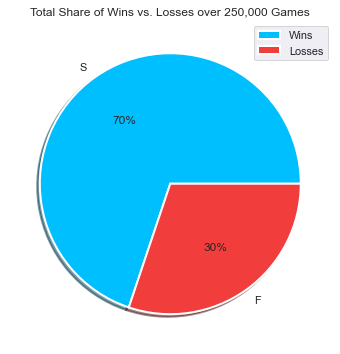

In [62]:
vc = data['victory_rank'].value_counts()
plt.figure(facecolor='white', figsize=(6,6))
plt.pie(vc, labels=vc.index, autopct='%.0f%%', colors=['deepskyblue', '#f23d3d'], shadow=True, wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title("Total Share of Wins vs. Losses over 250,000 Games")
plt.legend(['Wins', 'Losses'], loc='upper right')
plt.show()

Text(0, 0.5, 'Game Count')

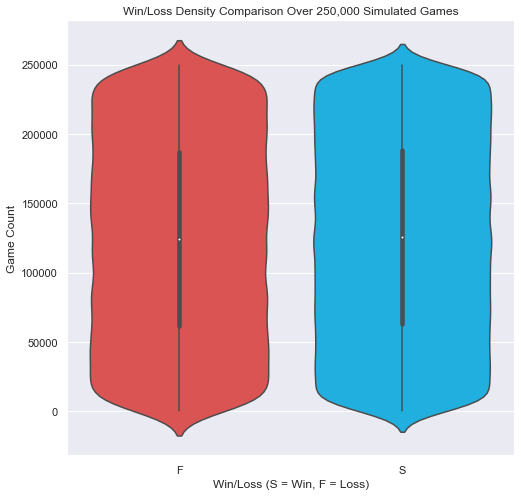

In [82]:
plt.figure(figsize=(8,8))
plt.title("Win/Loss Density Comparison Over 250,000 Simulated Games")
palette = {"S": "deepskyblue", "F": "#f23d3d"}
p = sns.violinplot(x='victory_rank', y='game_number', data=data.sample(frac=0.5), palette=palette)
p.set_xlabel("Win/Loss (S = Win, F = Loss)")
p.set_ylabel("Game Count")

<AxesSubplot:xlabel='survival_rank', ylabel='game_number'>

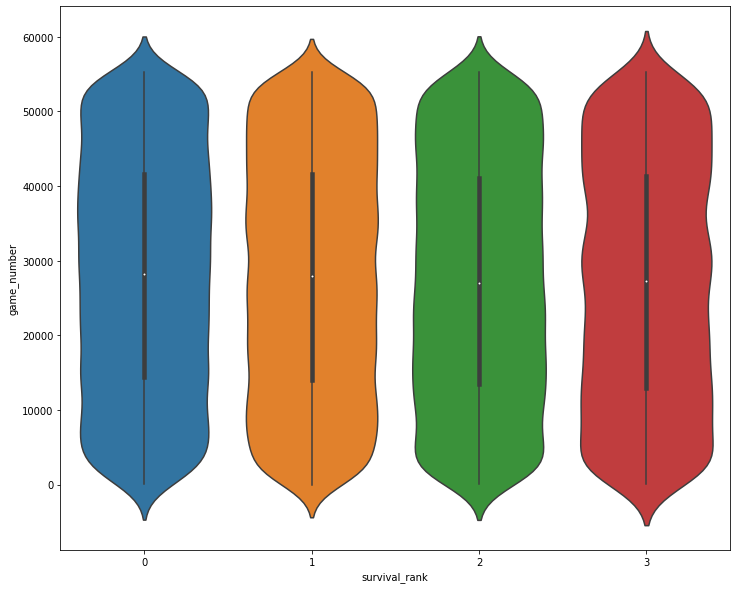

In [6]:
plt.figure(figsize=(12,10))
sns.violinplot(x='survival_rank', y='game_number', data=data)

In [7]:
data['survival_rank'].value_counts()

1    20070
0    13968
2    13901
3     7393
Name: survival_rank, dtype: int64

In [45]:
data.tail()

,game_number,victory_rank,survival_rank,tactic_rank,units
55327,55327,S,0,19,Rath-Guy-Eliwood
55328,55328,F,1,6,Marcus-Sain-Eliwood
55329,55329,S,0,6,Marcus-Guy-Hector
55330,55330,S,1,13,Canas-Erk-Hector
55331,55331,S,0,12,Kent-Marcus-Lyn


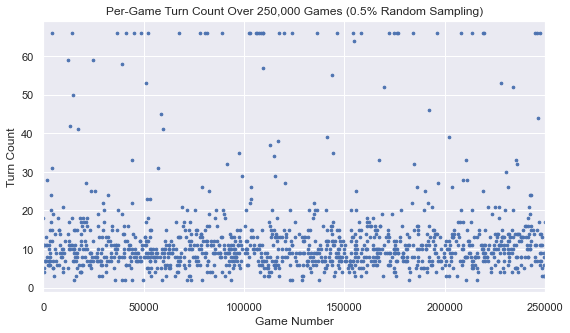

In [94]:
sns.set_theme()
plt.figure(figsize=(9,5))
plt.title("Per-Game Turn Count Over 250,000 Games (0.5% Random Sampling)")
plt.ylabel("Turn Count")
plt.xlabel("Game Number")
plt.xlim(0, 250000)
sample = data.sample(frac=0.005)
plt.scatter(x=sample['game_number'], y=sample['tactic_rank'], s=7)
#sns.scatterplot(x='game_number', y='tactic_rank', data=data.sample(frac=0.03))
plt.show()

In [9]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,units,unit_1,unit_2,unit_3
0,0,F,1,4,Marcus-Guy-Eliwood,Marcus,Guy,Eliwood
1,1,F,1,21,Oswin-Rath-Lyn,Oswin,Rath,Lyn
2,2,F,3,39,Kent-Guy-Hector,Kent,Guy,Hector
3,3,F,1,5,Guy-Lucius-Lyn,Guy,Lucius,Lyn
4,4,F,2,6,Sain-Erk-Eliwood,Sain,Erk,Eliwood
5,5,S,0,14,Canas-Guy-Hector,Canas,Guy,Hector
6,6,F,3,11,Heath-Bartre-Eliwood,Heath,Bartre,Eliwood
7,7,F,1,5,Raven-Matthew-Hector,Raven,Matthew,Hector
8,8,S,0,10,Sain-Marcus-Lyn,Sain,Marcus,Lyn
9,9,F,3,9,Erk-Kent-Lyn,Erk,Kent,Lyn


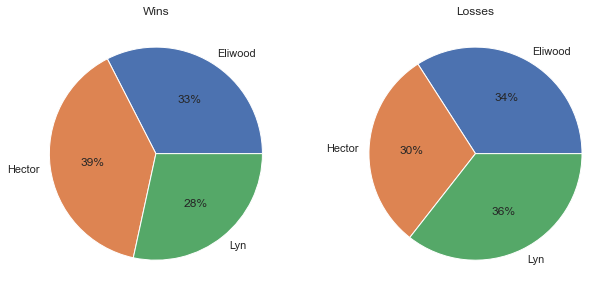

In [10]:
wins = data[data['victory_rank'] == 'S'].value_counts(subset='unit_3').sort_index()
losses = data[data['victory_rank'] == 'F'].value_counts(subset='unit_3').sort_index()

labels = ['Eliwood', 'Hector', 'Lyn']
sns.set_theme()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins, labels=labels, autopct='%.000f%%')
axs[1].pie(losses, labels=labels, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()

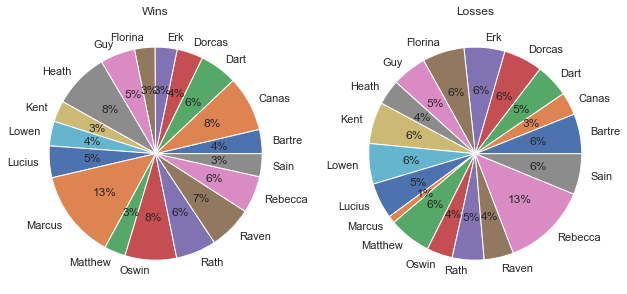

In [11]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()